In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv("drug_consumption.data",header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [4]:
colnames = ["id", "Age","Gender","Education", "Country", "Ethnicity", 
                "Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness", 
                "Impulsive", "Sensation Seeking", "Alcohol", "Amphetamines", "Amyl",
               "Benzos", "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack", 
               " Ecstasy", "Heroin", "Ketamine", "legalh", "LSD", "Meth", "Mushrooms",
               "Nicotine", "Semer", "VSA"]
data.columns = colnames


In [5]:
ndata = pd.DataFrame.to_numpy(data)
n,p = ndata.shape

In [6]:
## turn responses into binary: 
# used less frequently than in the past year is classified as nonuser coded by 0
# used in the past year or more frequently is classified as nonuser coded by 1
nw = False
for i in range(13,32):
    
    for j in range(n):
        if ndata[j][i] == "CL0" or ndata[j][i] == "CL1" or ndata[j][i] == "CL2":
            ndata[j][i] = 0.
        elif  ndata[j][i] == "CL3" or ndata[j][i] == "CL4" or ndata[j][i] == "CL5" or ndata[j][i] == "CL6":
            ndata[j][i] = 1.
        else:
            nw = True
            print("not working")
            break
    if nw:
        break


In [7]:
print(ndata.dtype)
ndata = ndata.astype('d')
print(ndata.dtype)

object
float64


In [8]:
response = ndata[:,13:]
response

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.]])

In [9]:
## turn into df and save
drugConsumption_BinaryResponseALL = pd.DataFrame(data=ndata, columns=colnames)

In [10]:
drugs = ["Benzos", "Caffeine","Cocaine","LSD","Heroin"]
drugConsumpotion_5Response = drugConsumption_BinaryResponseALL[["id", "Age","Gender","Education", "Country", "Ethnicity", 
                "Neuroticism", "Extraversion", "Openness", "Agreeableness", "Conscientiousness", 
                "Impulsive", "Sensation Seeking","Benzos", "Caffeine","Cocaine","LSD","Heroin"]]
drugConsumpotion_5Response.shape

(1885, 18)

In [14]:
os.getcwd()

'/Users/riddhib/Desktop/winter2021/STA_142a/finalproject/STA142aProject'

In [34]:
drugConsumption_BinaryResponseALL.to_csv('drugConsumption_BinaryResponseALL.csv',index = False)
drugConsumpotion_5Response.to_csv('drugConsumption_5Response.csv',index = False)

## Plots

In [12]:
freq = [sum(drugConsumpotion_5Response[i]) for i in drugs]
freq

[535.0, 1824.0, 417.0, 380.0, 118.0]

In [10]:
response.shape

(1885, 19)

In [19]:
nonmatch = np.zeros((19,19))
for i in range(response.shape[1]):
    for j in range(response.shape[1]):
        diff = response[:,i] - response[:,j]
        diff = np.absolute(diff)
        nonmatch[i,j] = sum(diff)

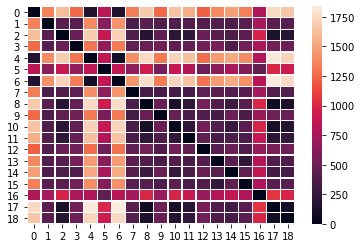

In [27]:
ax = sns.heatmap(nonmatch, linewidth=0.3)
plt.show()

<BarContainer object of 19 artists>

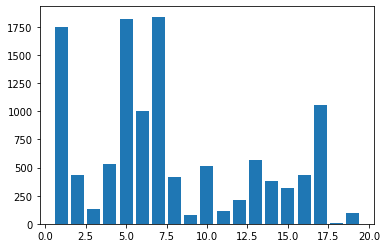

In [30]:
a = np.sum(response, axis = 0)
plt.bar(range(1,20), a)